1) Create a function to calculate the accumulated value of a principal amount (k) invested on January 1
of some year, earning interest at a nominal rate of interest compounded m times per year. The
function should calculate the accumulated value at the end of t years. Your function should
incorporate the parameters k, nom_rate, t, and m. Test that your function works correctly by using
the values k = 30,000, nom_rate = 0.102, t = 5, m = 3 and compare the value calculated by your
function to the accumulated value calculated by hand for the same parameters.

In [23]:
# code created by Rishabh Sinha

import datetime
import matplotlib.pyplot as plt

# Problem 1
def acc_val(k, nom_rate, t, m):
    return round(k * (1 + nom_rate / m) ** (m * t), 2)

print(acc_val(30000, 0.102, 5, 3))

49536.96


Hand calculations:
30000(1+0.102/3)^(3*5) = $ 49536.96

Both the code and hand calculations are the same.

2) Julia needs to accumulate 42,000 by January 1, 2026 to purchase a new car.
a) Create a function/program that calculates the present value of 42,000 as of January 1 for every
year from 2015 to 2026, assuming a rate of compound discount of 6.50\% per year.

In [24]:
# code created by Rishabh Sinha

# Problem 2a
def pv_y(fv, t, d):
    return fv * (1 - d)**t

print("\nYearly PV (Discount Effective):")
for y, pv in zip(list(range(2015, 2027)), [pv_y(42000, (2026 - y), 0.065) for y in list(range(2015, 2027))]):
    print(f"{y}/01/01: ${pv:,.2f}")


Yearly PV (Discount Effective):
2015/01/01: $20,052.89
2016/01/01: $21,446.94
2017/01/01: $22,937.91
2018/01/01: $24,532.52
2019/01/01: $26,237.99
2020/01/01: $28,062.02
2021/01/01: $30,012.86
2022/01/01: $32,099.31
2023/01/01: $34,330.82
2024/01/01: $36,717.45
2025/01/01: $39,270.00
2026/01/01: $42,000.00


b) Repeat part a) and also create a function/program that calculates the present value as of the
first day of every month (1/1, 2/1, 3/1, …12/1) AND a function/program that calculates the
present value as of the first day of every quarter (1/1, 4/1, 7/1, 10/1) for every year from 2015
through 1/1/2026, assuming a rate of compound discount of 6.50% per year convertible
quarterly. 

In [25]:
# code created by Rishabh Sinha
from datetime import datetime

def pv_yr_qc(acc, s, e, d, m):
    return [[datetime(y, 1, 1) for y in range(s, e + 1)], 
            [round(acc * (1 - d / m) ** (m * (e - y)), 2) for y in range(s, e + 1)]]

def pv_m_qc(acc, s, e, d, m):
    dts, pvs = [], []
    for y in range(s, e + 1):
        for mo in range(1, 13):
            t = e - y - (mo - 1) / 12
            dts.append(datetime(y, mo, 1))
            pvs.append(round(acc * (1 - d / m) ** (m * t), 2))
            if y == e and mo == 1: break
    return [dts, pvs]

def pv_q_qc(acc, s, e, d, m):
    dts, pvs = [], []
    for y in range(s, e + 1):
        for q in range(4):
            t = e - y - q / 4
            dts.append(datetime(y, 3 * q + 1, 1))
            pvs.append(round(acc * (1 - d / m) ** (m * t), 2))
            if y == e and q == 0: break
    return [dts, pvs]

def date_forming(dates):
    return [date.strftime("%Y-%m-%d") for date in dates]

print("Yearly Compounding:")
print(f"Dates: {date_forming(pv_yr_qc(42000, 2015, 2026, 0.065, 1)[0])}")
print(f"Values: {pv_yr_qc(42000, 2015, 2026, 0.065, 1)[1]}\n")

print("Quarterly Compounding:")
print(f"Dates: {date_forming(pv_yr_qc(42000, 2015, 2026, 0.065, 4)[0])}")
print(f"Values: {pv_yr_qc(42000, 2015, 2026, 0.065, 4)[1]}\n")

print("Monthly Compounding:")
print(f"Dates: {date_forming(pv_m_qc(42000, 2015, 2026, 0.065, 4)[0])}")
print(f"Values: {pv_m_qc(42000, 2015, 2026, 0.065, 4)[1]}\n")

print("Quarterly Compounding (qtr_pv):")
print(f"Dates: {date_forming(pv_q_qc(42000, 2015, 2026, 0.065, 4)[0])}")
print(f"Values: {pv_q_qc(42000, 2015, 2026, 0.065, 4)[1]}\n")

Yearly Compounding:
Dates: ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01']
Values: [20052.89, 21446.94, 22937.91, 24532.52, 26237.99, 28062.02, 30012.86, 32099.31, 34330.82, 36717.45, 39270.0, 42000.0]

Quarterly Compounding:
Dates: ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01']
Values: [20425.75, 21809.17, 23286.28, 24863.44, 26547.41, 28345.44, 30265.25, 32315.08, 34503.74, 36840.65, 39335.83, 42000.0]

Monthly Compounding:
Dates: ['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01

c) Provide a graphical representation of your results from part a) and b). In other words, graph the
values calculated by your functions. On the x-axis, show the calculation dates for the years 2015
through 1/1/2026, and show the present values on the y-axis.

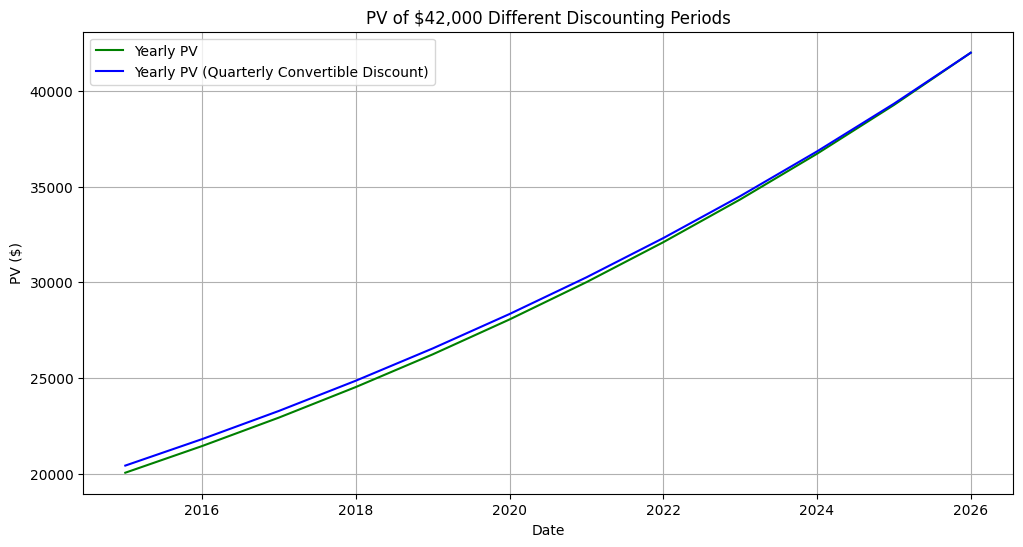

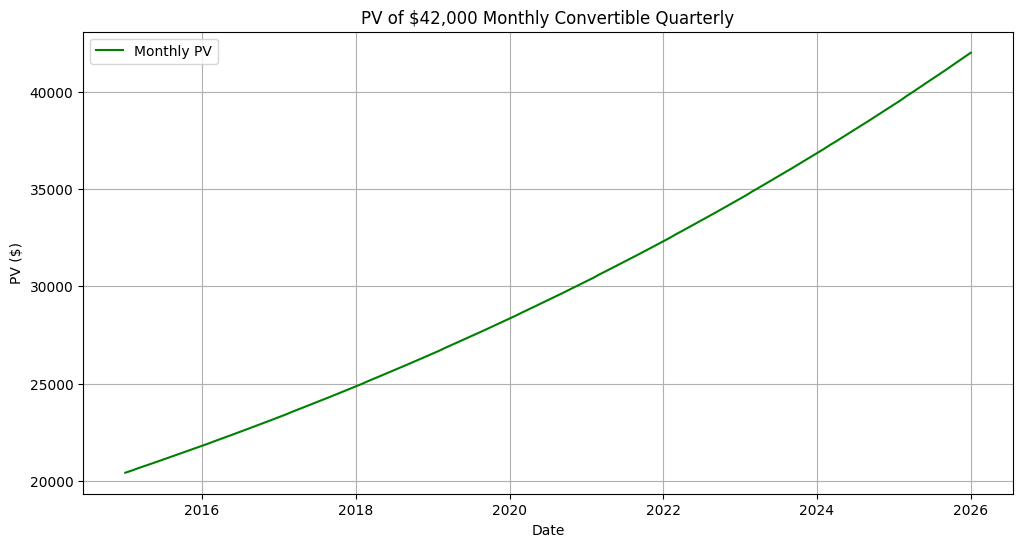

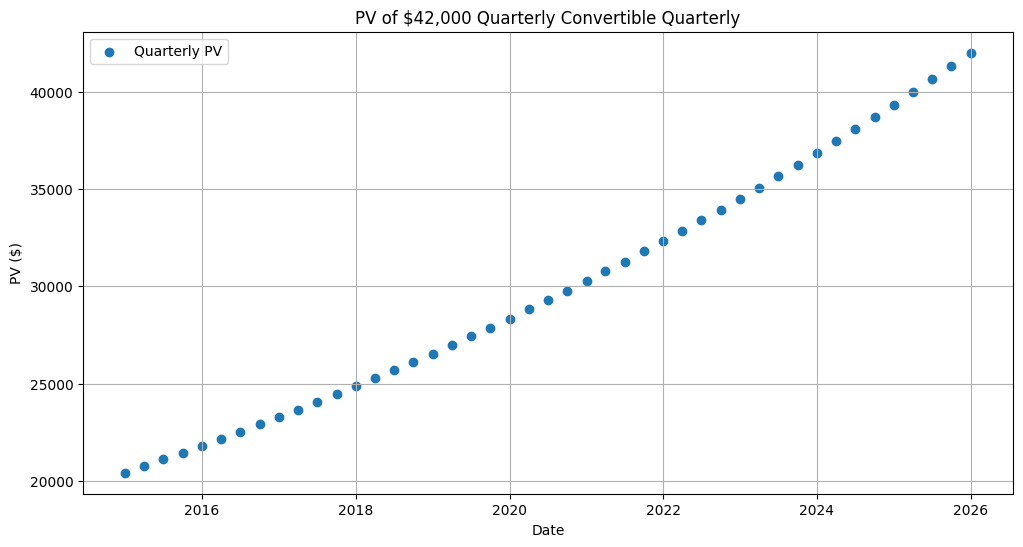

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(pv_yr_qc(42000, 2015, 2026, 0.065, 1)[0], pv_yr_qc(42000, 2015, 2026, 0.065, 1)[1], 'g-', label='Yearly PV')
plt.plot(pv_yr_qc(42000, 2015, 2026, 0.065, 4)[0], pv_yr_qc(42000, 2015, 2026, 0.065, 4)[1], 'b-', label='Yearly PV (Quarterly Convertible Discount)')
plt.xlabel('Date'); plt.ylabel('PV ($)')
plt.title('PV of $42,000 Different Discounting Periods')
plt.legend(); plt.grid(True)

plt.figure(figsize=(12, 6))
plt.plot(pv_m_qc(42000, 2015, 2026, 0.065, 4)[0], pv_m_qc(42000, 2015, 2026, 0.065, 4)[1], 'g-', label='Monthly PV')
plt.xlabel('Date'); plt.ylabel('PV ($)')
plt.title('PV of $42,000 Monthly Convertible Quarterly')
plt.legend(); plt.grid(True)

plt.figure(figsize=(12, 6))
plt.scatter(pv_q_qc(42000, 2015, 2026, 0.065, 4)[0], pv_q_qc(42000, 2015, 2026, 0.065, 4)[1], marker='o', label='Quarterly PV')
plt.xlabel('Date'); plt.ylabel('PV ($)')
plt.title('PV of $42,000 Quarterly Convertible Quarterly')
plt.legend(); plt.grid(True)